In [ ]:
import gdown
import zipfile
import os
folder_id = '1H-O9HLPPmVIYhCzJbsDIvbmNttZfdkYu'

url = f"https://drive.google.com/drive/folders/{folder_id}?usp=sharing"

gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}", quiet=False)

Retrieving folder contents


Processing file 1wfKXCkrrV--z5HdqIIQEptO8YlYKpUed Copy of Dataset.xlsx
Processing file 1bvKvK6lUc_6uv-H4JxU4SyuyXUl7HMVb Dataset.xlsx


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1wfKXCkrrV--z5HdqIIQEptO8YlYKpUed
To: /content/data/Copy of Dataset.xlsx
100%|██████████| 693k/693k [00:00<00:00, 10.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bvKvK6lUc_6uv-H4JxU4SyuyXUl7HMVb
To: /content/data/Dataset.xlsx
100%|██████████| 693k/693k [00:00<00:00, 8.50MB/s]
Download completed


['/content/data/Copy of Dataset.xlsx', '/content/data/Dataset.xlsx']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = 'Dataset.csv'  # Replace with your actual file path
nba = pd.read_excel('/content/data/Dataset.xlsx')

# Ensure 'FT%' is numeric
nba['FT%'] = pd.to_numeric(nba['FT%'], errors='coerce')

# Convert 'Game Date' to datetime
nba['Game Date'] = pd.to_datetime(nba['Game Date'])

# Define numeric columns to analyze
numeric_columns = ['PTS', 'FG%', '3P%', 'REB', 'AST', 'TOV','+/-']
nba[numeric_columns] = nba[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or invalid numeric data in these columns
nba_cleaned = nba.dropna(subset=numeric_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Team       2460 non-null   object        
 1   Match Up   2460 non-null   object        
 2   Game Date  2460 non-null   datetime64[ns]
 3   W/L        2460 non-null   object        
 4   MIN        2460 non-null   int64         
 5   PTS        2460 non-null   int64         
 6   FGM        2460 non-null   int64         
 7   FGA        2460 non-null   int64         
 8   FG%        2460 non-null   float64       
 9   3PM        2460 non-null   int64         
 10  3PA        2460 non-null   int64         
 11  3P%        2460 non-null   float64       
 12  FTM        2460 non-null   int64         
 13  FTA        2460 non-null   int64         
 14  FT%        2459 non-null   float64       
 15  OREB       2460 non-null   int64         
 16  DREB       2460 non-null   int64         


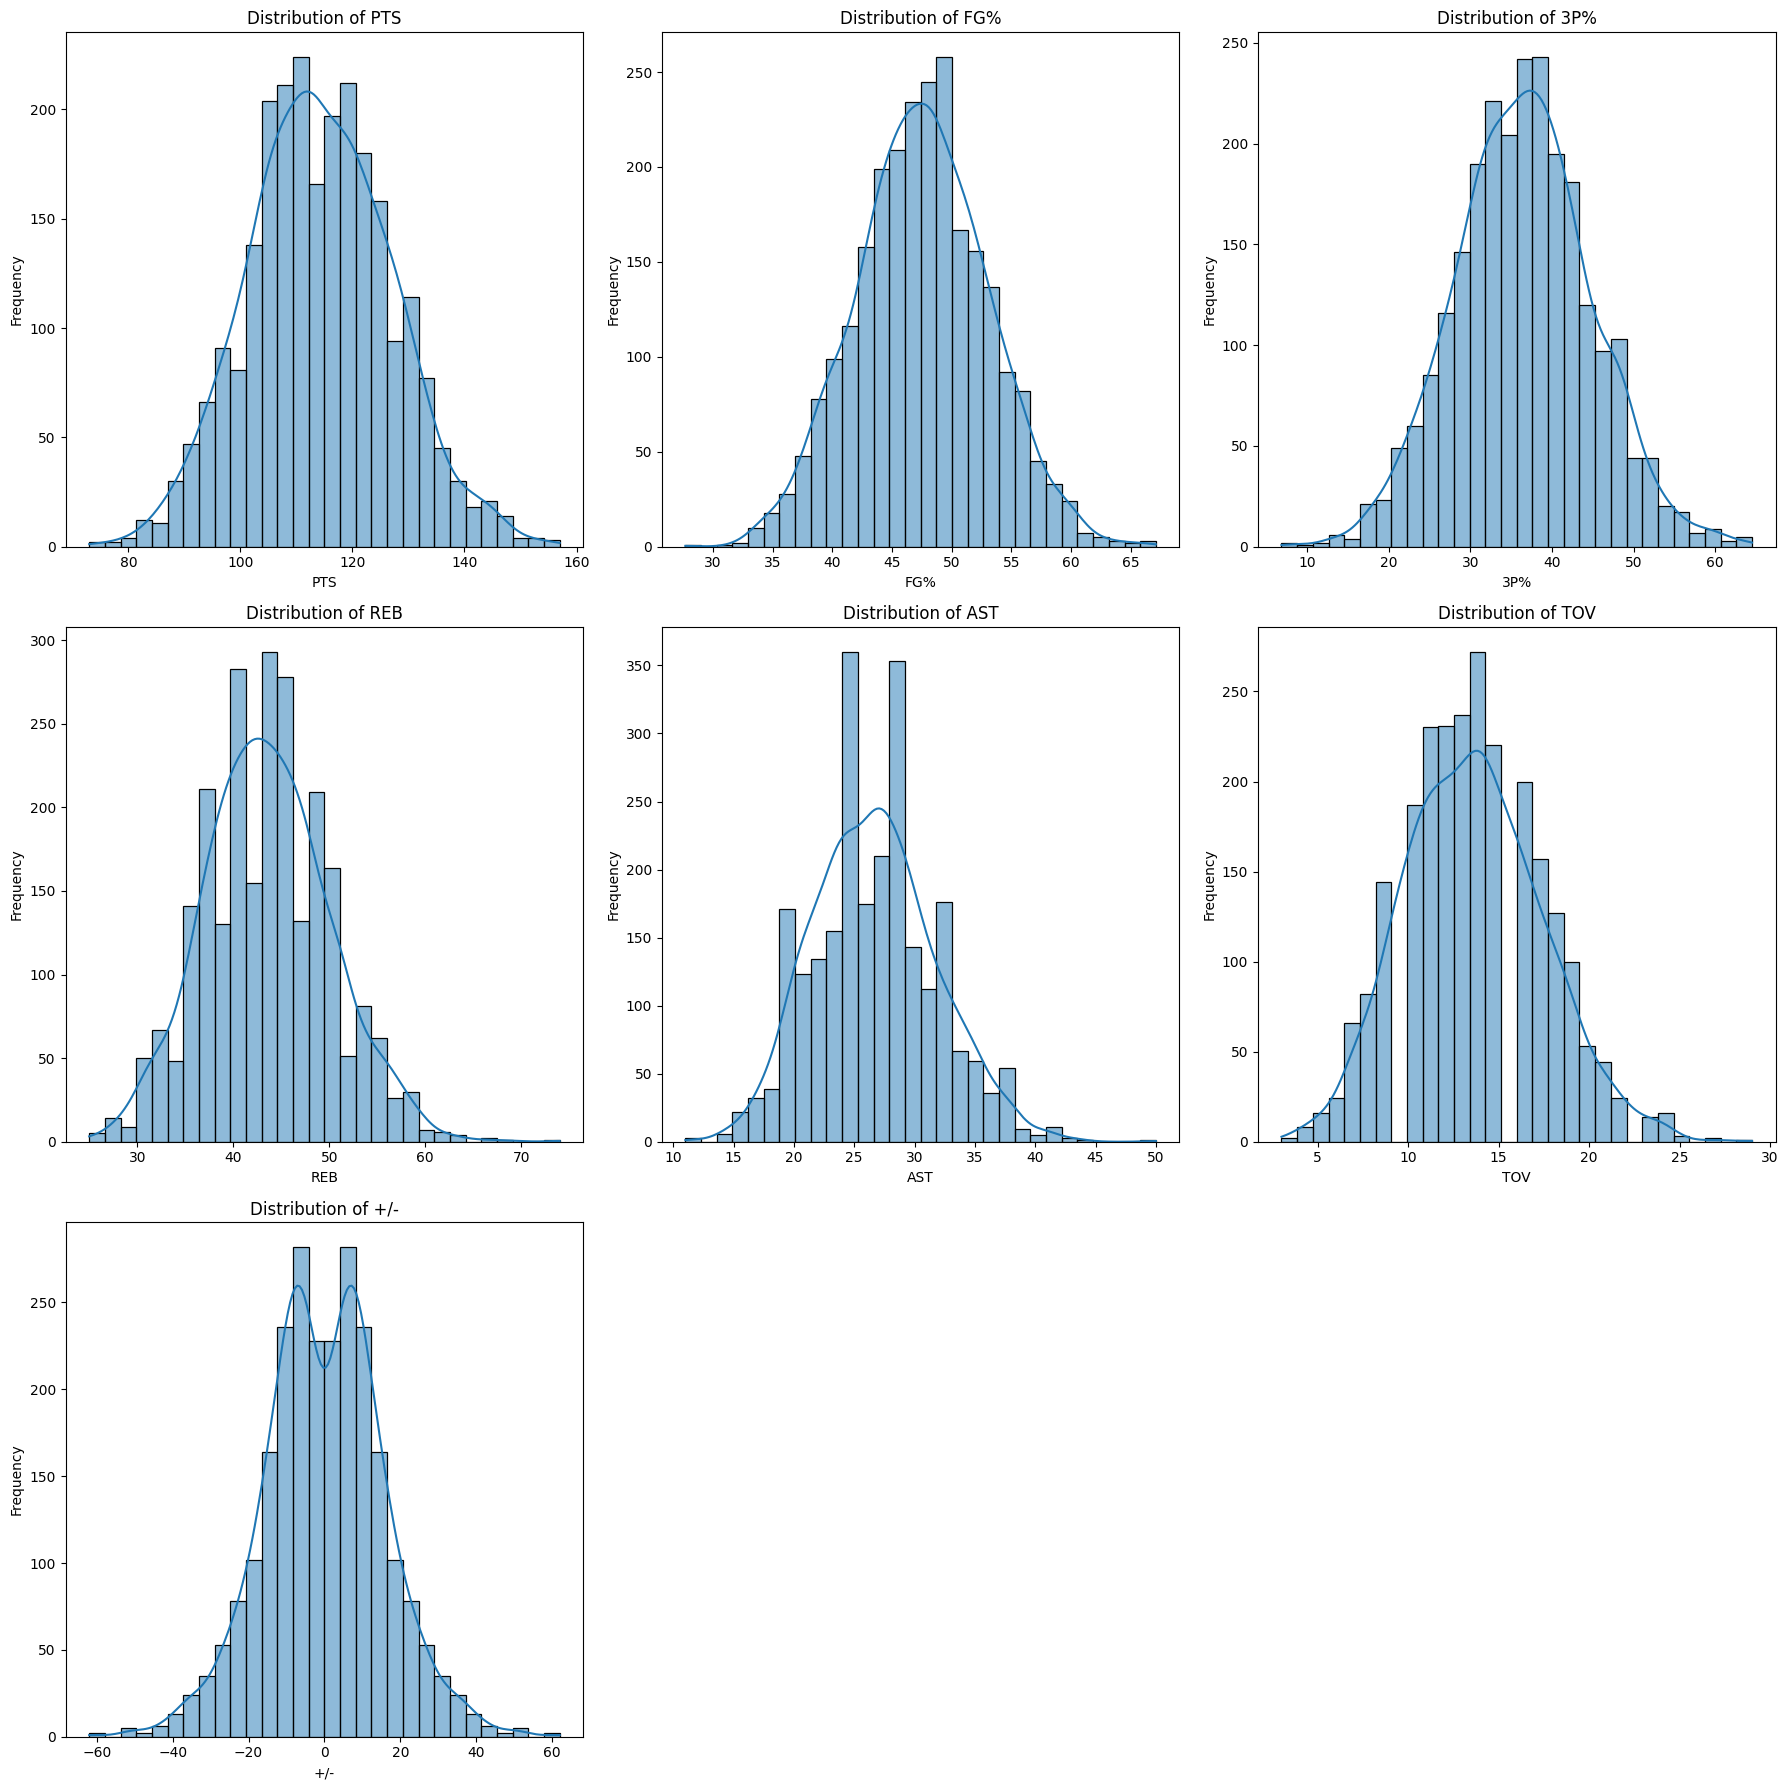

In [ ]:
# Convert 'FT%' to numeric, handling non-numeric entries by coercing to NaN
nba['FT%'] = pd.to_numeric(nba['FT%'], errors='coerce')

# Display basic information and descriptive statistics
nba.info()
stats_summary = nba.describe()

# Create subplots: Adjust rows and columns based on the number of numeric columns
num_cols = len(numeric_columns)
rows = (num_cols + 2) // 3  # 3 columns per row
cols = 3  # Fixed number of columns

fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))  # Adjust figure size for rows

# Flatten axes for easy iteration if needed
axes = axes.flatten()

# Loop through numeric columns and create a histogram for each
for i, col in enumerate(numeric_columns):
    sns.histplot(nba[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove any unused subplots (if num_cols isn't a perfect multiple of cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = nba.corr(numeric_only=True)  # Specify numeric_only=True for compatibility
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
txt = "Correlation coefficients range from -1 to 1, where values closer to -1 or 1 indicate higher correlation"
plt.figtext(0.45, 0.03, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("corrmatrix.png", format='png', dpi=300)  # Adjust dpi for better resolution
plt.close()
from google.colab import files
files.download("corrmatrix.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-6-32c01d912ffc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette="mako")


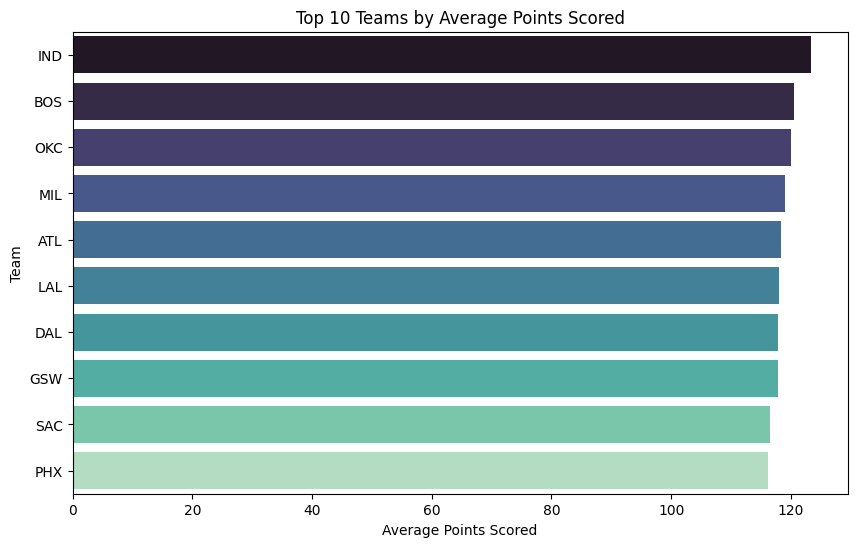

In [ ]:
# Top teams by average points scored
top_teams = nba.groupby("Team")["PTS"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette="mako")
plt.title("Top 10 Teams by Average Points Scored")
plt.xlabel("Average Points Scored")
plt.ylabel("Team")
plt.show()

In [ ]:
# Line plot: Average points scored over time
avg_points_by_date = nba.groupby('Game Date')['PTS'].mean()
plt.figure(figsize=(12, 6))
plt.plot(avg_points_by_date, marker='o')
plt.title("Average Points Scored Over Time")
plt.xlabel("Game Date")
plt.ylabel("Average Points")
plt.grid()
plt.savefig("avgpointsovertime.png", format='png', dpi=300)  # Adjust dpi for better resolution
plt.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-9-e6b98a2ec491>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=nba, x='W/L', y='PTS', palette="Set2")


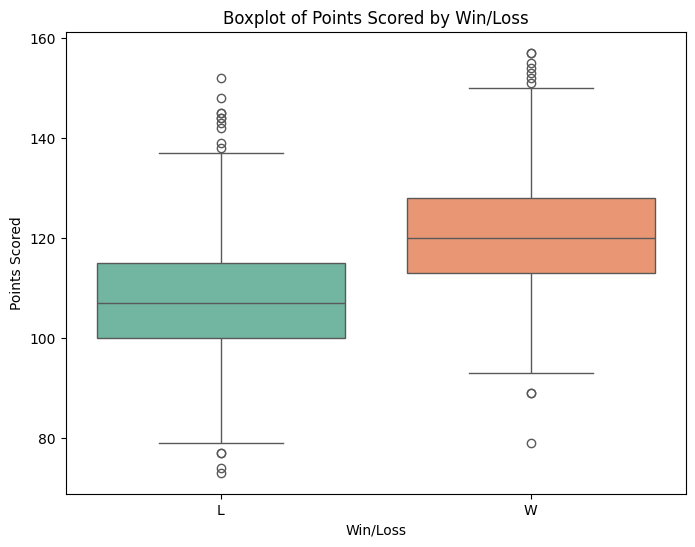

In [ ]:
# Boxplot: Points scored by win/loss
plt.figure(figsize=(8, 6))
sns.boxplot(data=nba, x='W/L', y='PTS', palette="Set2")
plt.title("Boxplot of Points Scored by Win/Loss")
plt.xlabel("Win/Loss")
plt.ylabel("Points Scored")
plt.show()

ValueError: Could not interpret value `Is_Home` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [ ]:
# Scatter plot: Field Goal Percentage vs. Points Scored
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba, x='FG%', y='PTS', hue='W/L', palette="coolwarm", s=50)
plt.title("Field Goal Percentage vs. Points Scored")
plt.xlabel("Field Goal Percentage (FG%)")
plt.ylabel("Points Scored")
plt.legend(title="Win/Loss")
plt.savefig("fieldgoal.png", format='png', dpi=300)  # Adjust dpi for better resolution
plt.close()
from google.colab import files
files.download("fieldgoal.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Scatter plot: Field Goal Percentage vs. Points Scored
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba, x='FG%', y='PTS', hue='W/L', palette="coolwarm", s=50)
plt.title("Field Goal Percentage vs. Points Scored")
plt.xlabel("Field Goal Percentage (FG%)")
plt.ylabel("Points Scored")
plt.legend(title="Win/Loss")
plt.savefig("fieldgoal.png", format='png', dpi=300)  # Adjust dpi for better resolution
plt.close()
from google.colab import files
files.download("fieldgoal.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Scatter plot: Field Goal Percentage vs. Points Scored
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba, x='FT%', y='PTS', hue='W/L', palette="coolwarm", s=50)
plt.title("Free Throw Percentage vs. Points Scored")
plt.xlabel("Free Throw Percentage (FT%)")
plt.ylabel("Points Scored")
plt.legend(title="Win/Loss")
plt.savefig("freethrow.png", format='png', dpi=300)  # Adjust dpi for better resolution
plt.close()
from google.colab import files
files.download("freethrow.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Scatter plot: Field Goal Percentage vs. Points Scored
nba_bos = nba[nba['Team'] == 'MIL']
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba_bos, x='FT%', y='PTS', hue='W/L', palette=['#F6B99C', '#ABC7FC'], s=50)
plt.title("MIL:Free Throw Percentage vs. Points Scored")
plt.xlabel("Free Throw Percentage (FT%)")
plt.ylabel("Points Scored")
plt.legend(title="Win/Loss")

plt.savefig("freethrow_mil.png", format='png', dpi=300)  # Adjust dpi for better resolution
plt.close()
from google.colab import files
files.download("freethrow_mil.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'plt.savefig("freethrow_lal.png", format=\'png\', dpi=300)  # Adjust dpi for better resolution\nplt.close()\nfrom google.colab import files\nfiles.download("freethrow_lal.png")'

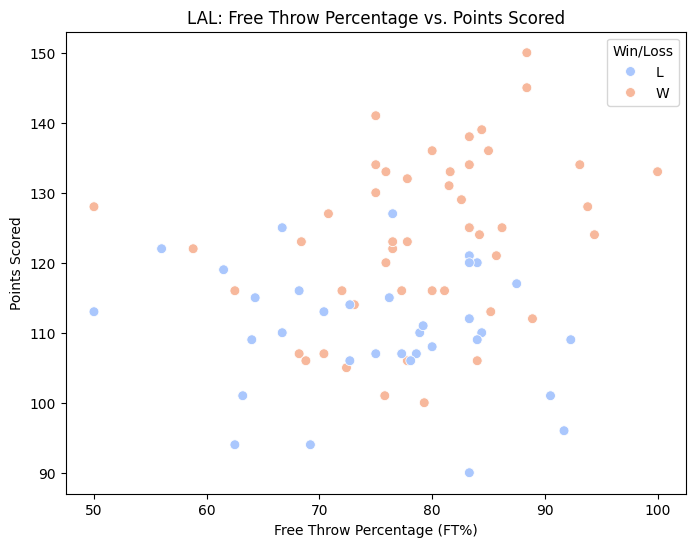

In [ ]:
nba_lal= nba[nba['Team'] == 'LAL']
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba_lal, x='FT%', y='PTS', hue='W/L', palette="coolwarm", s=50)
plt.title("LAL: Free Throw Percentage vs. Points Scored")
plt.xlabel("Free Throw Percentage (FT%)")
plt.ylabel("Points Scored")
plt.legend(title="Win/Loss")

'''plt.savefig("freethrow_lal.png", format='png', dpi=300)  # Adjust dpi for better resolution
plt.close()
from google.colab import files
files.download("freethrow_lal.png")'''

In [ ]:
# Scatter plot: Field Goal Percentage vs. Points Scored
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba, x='3P%', y='PTS', hue='W/L', palette="coolwarm", s=50)
plt.title("Three Point Percentage vs. Points Scored")
plt.xlabel("Three Point Percentage (3P%)")
plt.ylabel("Points Scored")
plt.legend(title="Win/Loss")
plt.savefig("3P.png", format='png', dpi=300)  # Adjust dpi for better resolution
plt.close()
from google.colab import files
files.download("3P.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

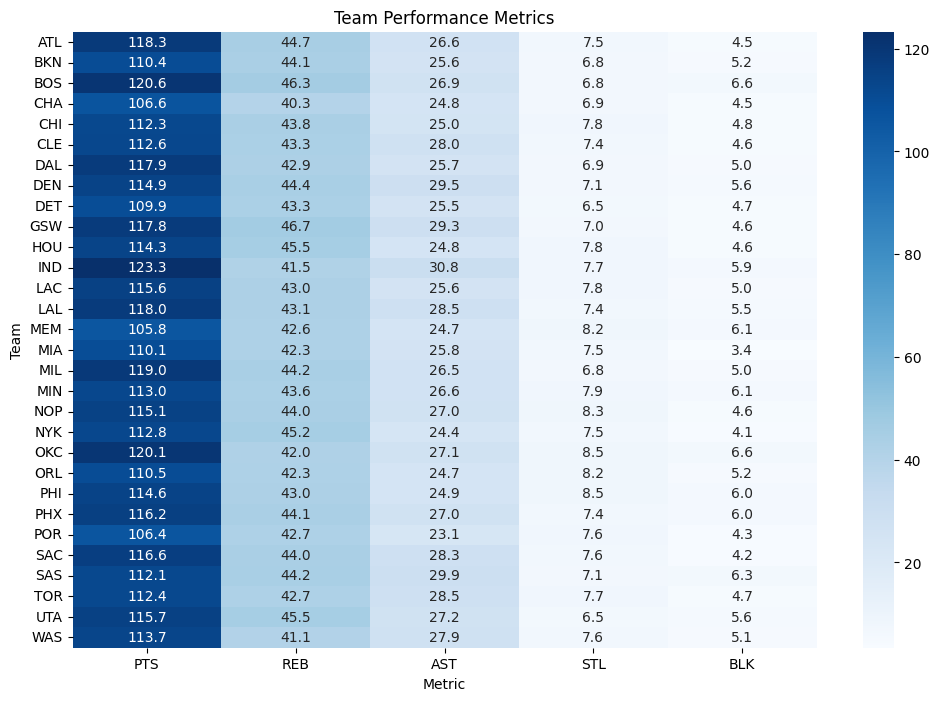

In [ ]:
# Heatmap: Team performance metrics
team_metrics = nba.groupby('Team')[['PTS', 'REB', 'AST', 'STL', 'BLK']].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(team_metrics, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.title("Team Performance Metrics")
plt.xlabel("Metric")
plt.ylabel("Team")
plt.show()

Text(0.5, 1.02, 'Pairplot of Key Metrics (Adjusted Visualization)')

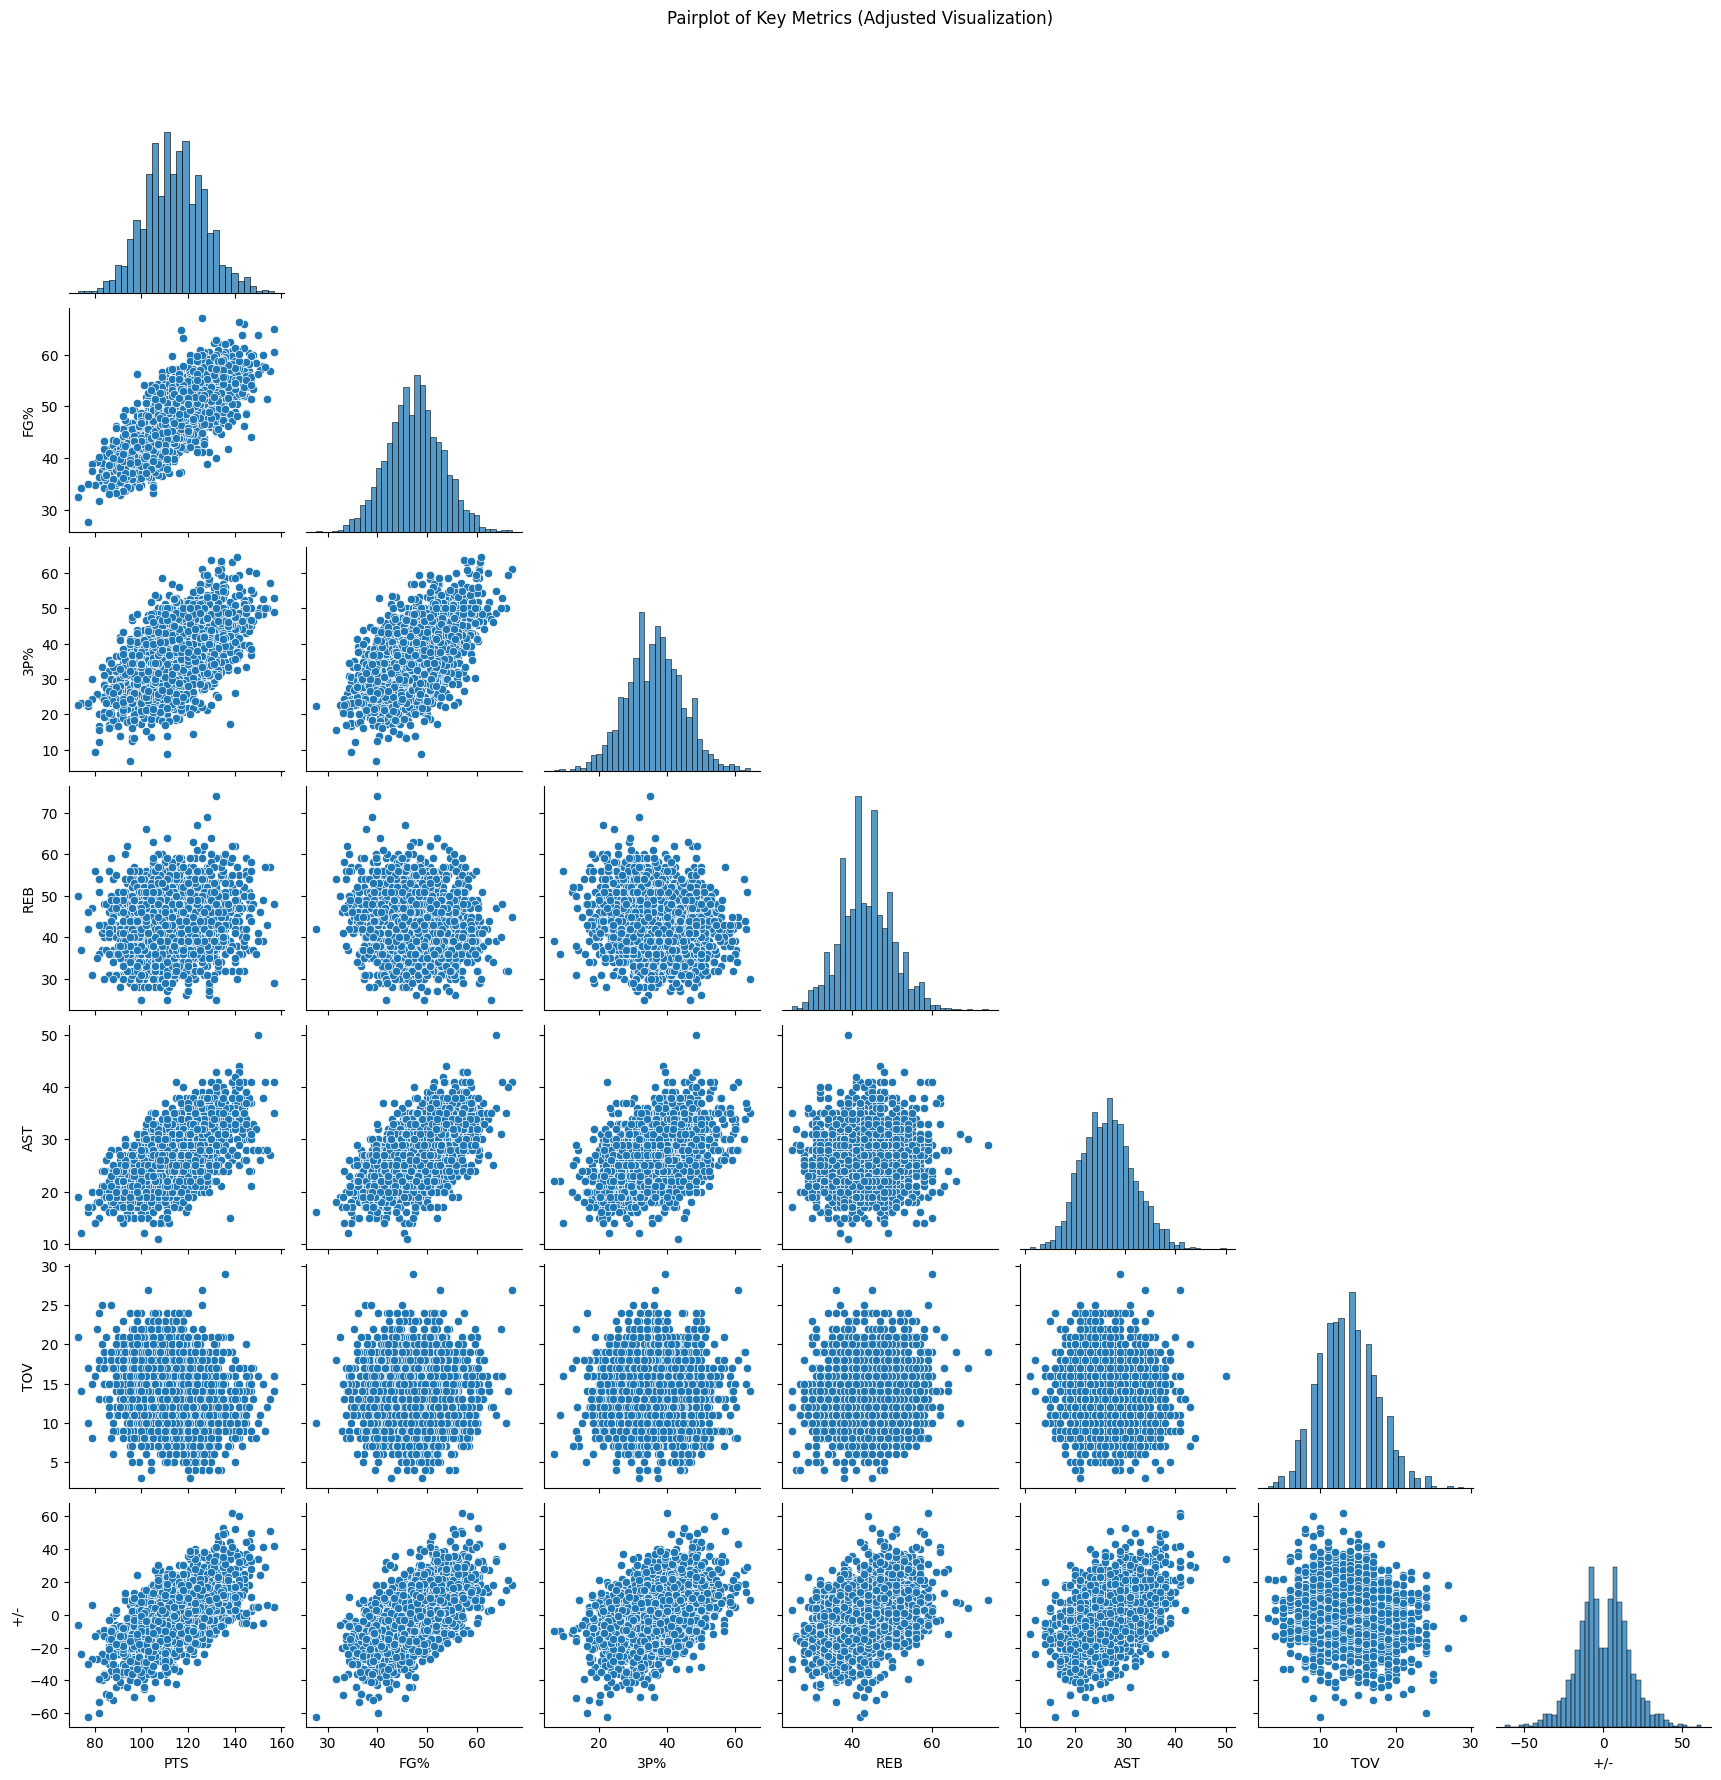

In [ ]:
sns.pairplot(nba_cleaned[numeric_columns], diag_kind="hist", corner=True)
plt.suptitle("Pairplot of Key Metrics (Adjusted Visualization)", y=1.02)

<ipython-input-12-a5270ecc5203>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rebound_teams.values, y=top_rebound_teams.index, palette="viridis")


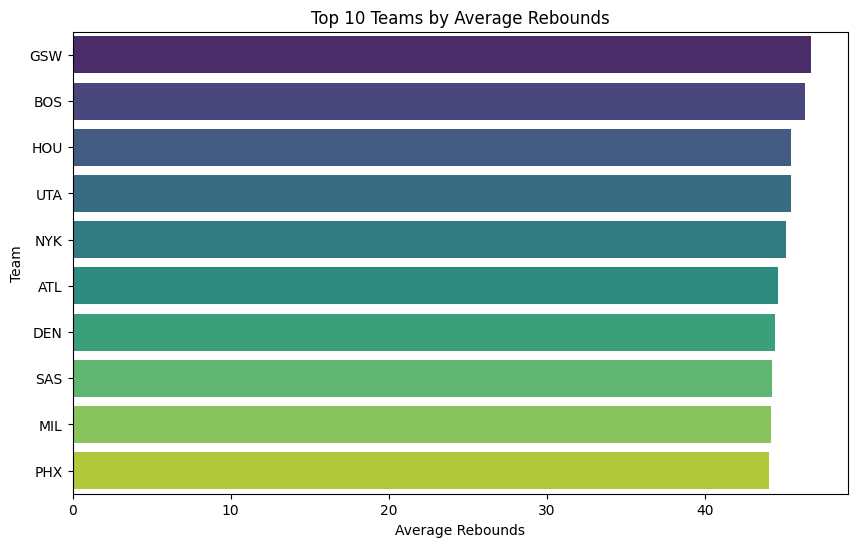

In [ ]:
# Bar chart: Top 10 teams by average rebounds
top_rebound_teams = nba.groupby("Team")["REB"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rebound_teams.values, y=top_rebound_teams.index, palette="viridis")
plt.title("Top 10 Teams by Average Rebounds")
plt.xlabel("Average Rebounds")
plt.ylabel("Team")
plt.show()